In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(42)
xs = np.linspace(0, 10, 100)
ys = xs + np.random.random(100) * 2 - 1

X = xs.reshape(-1, 1)
y = ys

model = LinearRegression()
model.fit(X, y)

print("Коэффициент наклона (slope):", model.coef_[0])
print("Смещение (intercept):", model.intercept_)

y_pred = model.predict(X)

Коэффициент наклона (slope): 1.0040984640489807
Смещение (intercept): -0.08013083348848582


In [3]:
with open("model_coefficients.csv", "w+", newline='') as f:
    writer = csv.writer(f)
    writer.writerow([model.coef_[0], model.intercept_])

In [4]:
!cat model_coefficients.csv

1.0040984640489807,-0.08013083348848582


In [5]:
def scat(xs, ys, y_pred):
    plt.scatter(xs, ys)
    plt.plot(xs, y_pred, color='red', linewidth=2)
    plt.show()

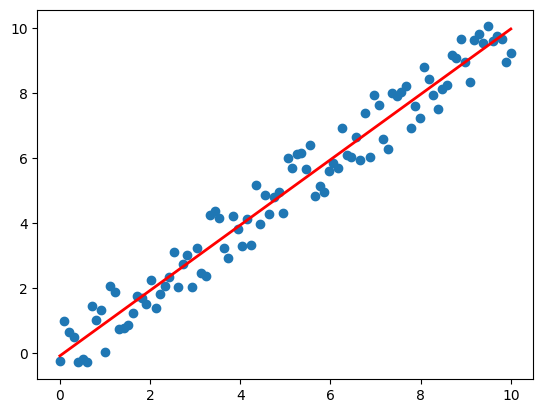

In [6]:
scat(xs, ys, y_pred)

In [7]:
np.random.seed(42)
xs_2 = np.linspace(0, 10, 100)
ys_2 = xs_2 + np.random.random(100) * 2 - 1
ys_2[25:45] *= 2

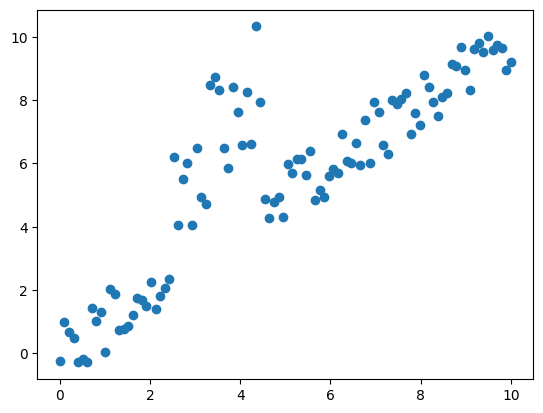

In [8]:
plt.scatter(xs_2, ys_2)
plt.show()

In [9]:
X_noise = xs_2.reshape(-1, 1)
y_noise = ys_2

noise_model = LinearRegression()
noise_model.fit(X_noise, y_noise)

print("Коэффициент наклона (slope):", noise_model.coef_[0])
print("Смещение (intercept):", noise_model.intercept_)

y_pred_noise = noise_model.predict(X_noise)

Коэффициент наклона (slope): 0.8906094750144905
Смещение (intercept): 1.1652910107286036


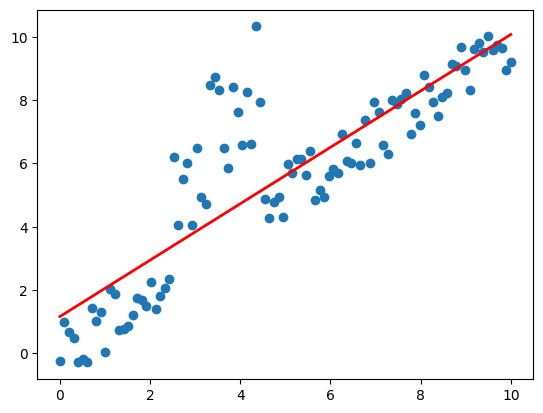

In [10]:
scat(xs_2, ys_2, y_pred_noise)

In [11]:
with open("model_coefficients_noise.csv", "w+", newline='') as f:
    writer = csv.writer(f)
    writer.writerow([noise_model.coef_[0], noise_model.intercept_])

In [12]:
!cat model_coefficients_noise.csv

0.8906094750144905,1.1652910107286036


In [13]:
%%writefile test_model_coefficients.py
import csv

def test_csv_values_true_model():
     expected_x = 1.0040984640489807
     expected_y = -0.08013083348848582

     with open('model_coefficients.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_csv_values_noise_model():
     expected_x = 1.0040984640489807
     expected_y = -0.08013083348848582

     with open('model_coefficients_noise.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_csv_values_true_model_1():
     expected_x = 0.8906094750144905
     expected_y = 1.1652910107286036

     with open('model_coefficients.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

def test_csv_values_noise_model_1():
     expected_x = 0.8906094750144905
     expected_y = 1.1652910107286036

     with open('model_coefficients_noise.csv', newline='') as file:
         reader = csv.reader(file)
         row = next(reader)
         x, y = map(float, row)

     assert x == expected_x
     assert y == expected_y

Writing test_model_coefficients.py


In [14]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0
rootdir: /content
plugins: anyio-3.6.2
collected 4 items                                                              

test_model_coefficients.py .FF.                                          [100%]

=================================== FAILURES ===================================
_________________________ test_csv_values_noise_model __________________________

    def test_csv_values_noise_model():
         expected_x = 1.0040984640489807
         expected_y = -0.08013083348848582
    
         with open('model_coefficients_noise.csv', newline='') as file:
             reader = csv.reader(file)
             row = next(reader)
             x, y = map(float, row)
    
>        assert x == expected_x
E        assert 0.8906094750144905 == 1.0040984640489807

test_model_coefficients.py:24: AssertionError
_________________________ test_csv_values_true